In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

# Bibliotecas gráficas
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Identificar valores nulos
#!pip install missingno
import missingno as msno

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações
# Pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')


In [2]:
base = pd.read_csv('water_potability.csv')

In [3]:
base.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Últimos
base.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [6]:
# Campos nulos
base.isnull().sum() /len(base) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

<AxesSubplot:>

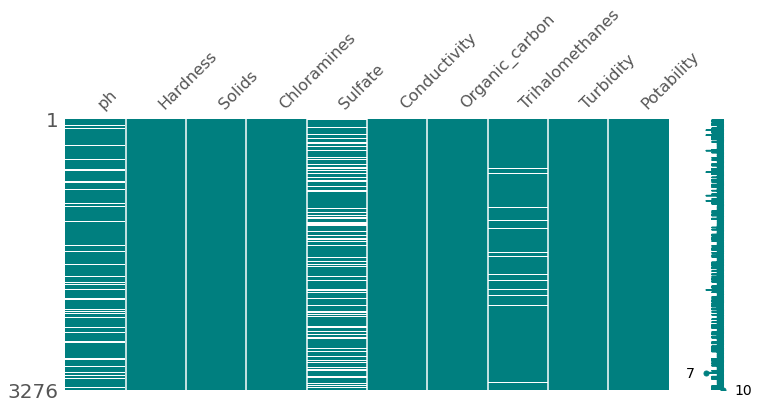

In [7]:
# Nulos em forma gráfica
msno.matrix( base, color=(0, 0.5, 0.5), figsize=(12, 5) )

In [8]:
# Describe
base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
copia_base = base.copy
# Removendo nulos
base.dropna( inplace=True )

# Dimensão
base.shape

(2011, 10)

In [10]:
# Variável Target
base['Potability'].value_counts( normalize=True) * 100

0    59.671805
1    40.328195
Name: Potability, dtype: float64

<AxesSubplot:title={'center':'Distribuição da Target'}, xlabel='Potability', ylabel='count'>

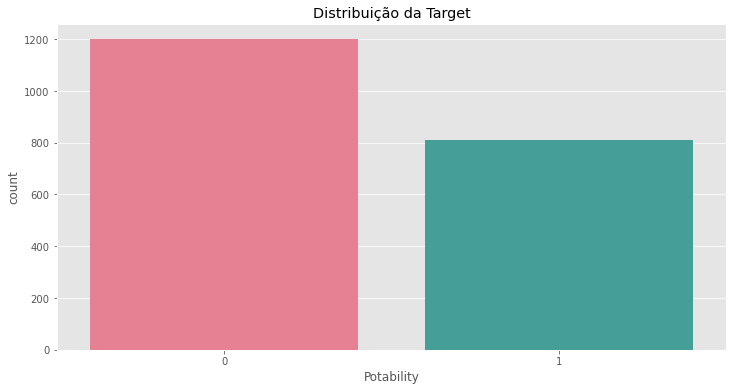

In [11]:
# Plot
plt.title('Distribuição da Target')

sns.countplot(
    data = base,
    x = 'Potability',
    palette='husl'
)

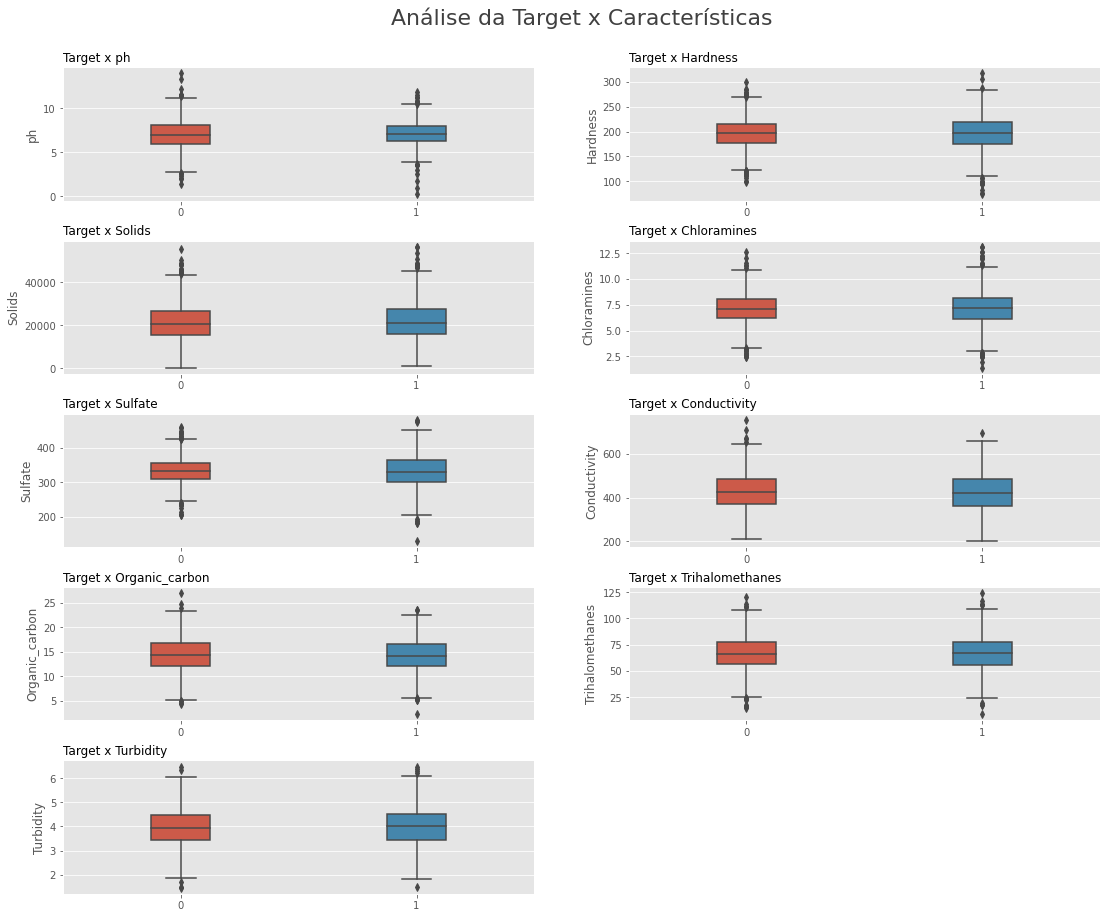

In [12]:
# Plot target x categorias
Figura, Eixo = plt.subplots( figsize=(18,14) )
# Título
plt.suptitle('Análise da Target x Características', fontsize=22, color='#404040')

# Grid
colunas = 2
linhas = int(len(base.columns) / 2)

# Loop dos Plots

for Posicao, Coluna in enumerate( base.columns ):
    if Posicao == 9:
        pass
    else:
        plt.subplot( linhas, colunas, Posicao + 1 )
        plt.title(f'Target x {Coluna}', loc='left', fontsize=12)
        sns.boxplot(
            data=base,
            x='Potability',
            y=Coluna,
            width=0.25,  
        )
        
        plt.xlabel('')
# Ajustando os espaços
plt.subplots_adjust(
    left=0.1,
    bottom=0.1,
    right=0.9,
    top=0.92,
    wspace=0.20,
    hspace=0.30
);

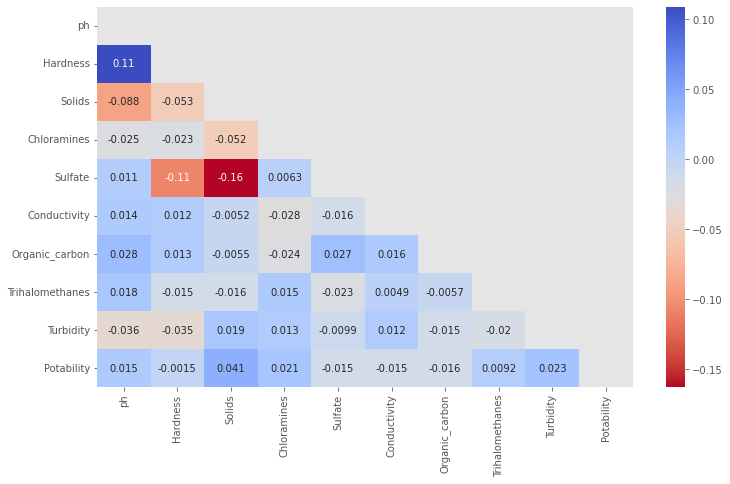

In [13]:
# Correlação

# Tamanho
plt.figure( figsize=(12, 7) )

# Ajustar a matriz
correlacao = base.corr()
matriz = np.triu( correlacao )

sns.heatmap( base.corr(), mask=matriz, annot=True, cmap='coolwarm_r' );

In [14]:
# Divisão dos dados
Caracteristicas = base.drop( columns=['Potability'] )
Previsor = base['Potability']

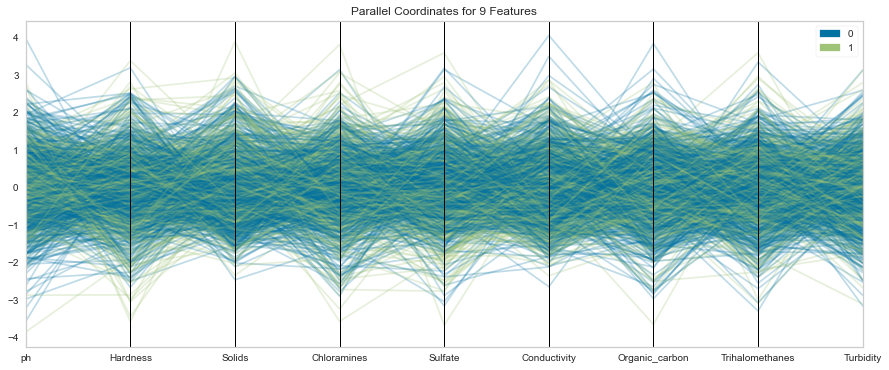

In [15]:
# YellowBrick
from yellowbrick.features import ParallelCoordinates

# Divisão
Features = Caracteristicas.columns
Classe   = [0, 1]

# Instanciar
Visualizador = ParallelCoordinates(
    classes = Classe,
    features = Features,
    sample=0.5,
    shuffle=True,
    normalize='standard'
)

# Tamanho
plt.figure( figsize=(15, 6) )

# Plot
Visualizador.fit_transform( Caracteristicas, Previsor )
Visualizador.show();

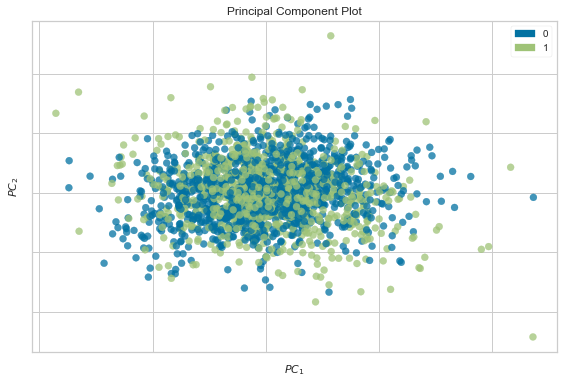

In [16]:
# YellowBrick
from yellowbrick.features import PCA

# Classe
Classe   = [0, 1]

# Instanciar
grafico_PCA = PCA(
    scale=True,
    classes=Classe
)

grafico_PCA.fit_transform( Caracteristicas, Previsor )
grafico_PCA.show();

In [17]:
# Conclusão os dados não são divisíveis. 
# São muito similares 
# Nosso modelo não vai conseguir dividir bem uma classe
# Não tem uma predoninancia de uma classe que possa ser feito um CORTE
# Já tem uma ideia do que espera-se do modelo


In [18]:
# Divisão de teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Caracteristicas,
    Previsor,
    test_size=0.2,
    random_state=10
)
# Dados para treino e dados para teste
print(X_train.shape[0], X_test.shape[0])

1608 403


In [19]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# instanciar 
model = RandomForestClassifier()

# fit do modelo
model.fit( X_train, y_train )

# Previsões
previsoes_treino = model.predict( X_train )
previsoes_teste = model.predict( X_test )

In [20]:
# Overfitting
print('Accuracy no treino: ',accuracy_score( y_train, previsoes_treino) )
print('Accuracy no teste: ',accuracy_score( y_test, previsoes_teste) )

Accuracy no treino:  1.0
Accuracy no teste:  0.6823821339950372


In [21]:
# Confusion Matrix
confusion_matrix(y_test, previsoes_teste)

array([[202,  36],
       [ 92,  73]], dtype=int64)

In [22]:
# Report Classification
print(classification_report(y_test, previsoes_teste))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       238
           1       0.67      0.44      0.53       165

    accuracy                           0.68       403
   macro avg       0.68      0.65      0.65       403
weighted avg       0.68      0.68      0.67       403



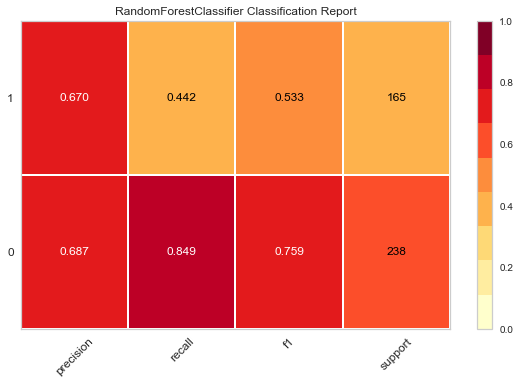

In [23]:
from yellowbrick.classifier import ClassificationReport
classes = [0, 1]

visualizador = ClassificationReport(
    model, 
    classes=classes, 
    support=True
)

visualizador.fit( X_train, y_train)
visualizador.score( X_test, y_test)
visualizador.show();

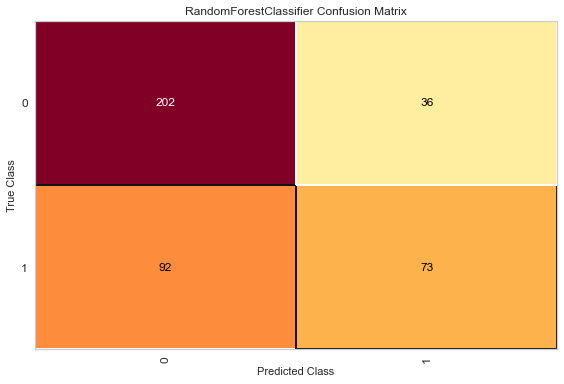

In [24]:
from yellowbrick.classifier import ConfusionMatrix
classes = [0, 1]

visualizador = ConfusionMatrix(
    model, 
    classes=classes, 
    support=True
)

visualizador.fit( X_train, y_train)
visualizador.score( X_test, y_test)
visualizador.show();

In [25]:
# Pipeline

# Modelos
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


# Metricas
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error
# Modelos
Modelos_Pipeline = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Ridge', RidgeClassifier()),
    ('Support Vector Classifier', SVC() ),
    ('Decision Tree', DecisionTreeClassifier() ),
    ('Gaussian NB', GaussianNB() ),
    ('Ada Boost Classifier', AdaBoostClassifier() ),
    ('XGB Classifier', XGBClassifier(verbosity = 0)),
]

# Dicionario para arm. os resultados
Resultados = dict()

# Loops rodandos os moldeos
for Nome, Modelo in Modelos_Pipeline:

    # Fitar
    Modelo.fit( X_train, y_train)

    # Previsoes
    Previsao = Modelo.predict( X_test )
    
    # Metricas
    score = accuracy_score( y_test, Previsao)    
    precision = precision_score(y_test, Previsao) 
    Resultados[Nome] = score  


In [26]:
# Compilar os resultados
DF_Resultados = pd.DataFrame([ Resultados ])

# Columa --> index
DF_Resultados = DF_Resultados.transpose()

# Ordenei
DF_Resultados = DF_Resultados.rename( columns={0:'Acurácia'}).sort_values(by='Acurácia',ascending=False)

In [27]:
# Resultados
DF_Resultados

,Acurácia
XGB Classifier,0.652605
Gaussian NB,0.622829
Ridge,0.593052
Logistic Regression,0.590571
Support Vector Classifier,0.590571
Decision Tree,0.588089
Ada Boost Classifier,0.575682


In [28]:
# Tuning - RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Hiperparametros
Hiper_Parametros = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": np.arange(2, 16, 2),
    "min_samples_leaf": np.arange(1, 16, 1) }

# Buscar
Random_Tunado = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = Hiper_Parametros,
    cv=5,
    verbose=True
)

# Fitar
Random_Tunado.fit( X_train, y_train )

# Mostar o melhor
Random_Tunado.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': None}

In [29]:
# Overfitting
treino, teste = Random_Tunado.score(X_train, y_train), Random_Tunado.score(X_test, y_test)
(treino, teste)

(0.9956467661691543, 0.6923076923076923)

In [30]:
# Funções de Classificação 
!pip install pycaret
!pip install shap
#from pycaret.classification import *

  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached spacy-2.3.8-cp39-cp39-win_amd64.whl (9.1 MB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached mlflow-2.0.1-py3-none-any.whl (16.5 MB)
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached numba-0.54.1-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached PyYAML-5.4.1-cp39-cp39-win_amd64.whl (213 kB)
  Using cached pyod-1.0.6-py3-none-any.whl
  Using cached scipy-1.5.4-cp39-cp39-win_amd64.whl (31.4 MB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB

  ERROR: Command errored out with exit status 1:
   command: 'D:\anaconda3\python.exe' 'C:\Users\lucia\AppData\Local\Temp\pip-standalone-pip-84c9_eza\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\lucia\AppData\Local\Temp\pip-build-env-asl5nr_e\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_syste


  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Using cached pycaret-2.3.9-py3-none-any.whl (319 kB)
  Using cached pycaret-2.3.8-py3-none-any.whl (318 kB)
  Using cached pycaret-2.3.7-py3-none-any.whl (318 kB)
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached pycaret-2.3.5-py3-none-any.whl (288 kB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached numba-0.53.1-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached pycaret-2.3.3-py3-none-any.whl (264 kB)
  Using cached pycaret-2.3.2-py3-none-any.whl (263 kB)
  Using cached pycaret-2.3.1-py3-none-any.whl (261 kB)
  Using cached pycaret-2.3.0-py3-none-any.whl (261 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached pycaret-2.2.3-py3-none-any.whl (249 kB)
  Using cached spacy-3.4.3-cp39-cp39-win_amd64.whl (11.9 MB)
  Using cached pycaret-2.2.2-py3-none-any.w

In [32]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'